In [1]:
import numpy as np
import tensorflow as tf

In [2]:
from matplotlib import pyplot as plt

In [3]:
def prepare_data(timeseries_data, n_steps):
    X, y = [], []
    for i in range(len(timeseries_data)):
        end_of_sample = i + n_steps
        if end_of_sample > len(timeseries_data)-1:
            break
        # gather i/p and o/p parts of pattern
        seq_x = timeseries_data[i:end_of_sample]
        seq_y = timeseries_data[end_of_sample]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [4]:
timeseries_data = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233]
n_steps = 3
X, y = prepare_data(timeseries_data, n_steps)

In [5]:
X.shape

(11, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, n_features]
n_features = 1
X = X.reshape(X.shape[0], X.shape[1], n_features)

In [7]:
X.shape

(11, 3, 1)

# Model construction and training

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(tf.keras.layers.LSTM(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mse')

In [9]:
# to use saved model if saved
# model = tf.keras.models.load_model('time_series.h5')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 22,097
Trainable params: 22,097
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 0.0031
Epoch 2/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0031
Epoch 3/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0031
Epoch 4/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0031
Epoch 5/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.0031
Epoch 6/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.0031
Epoch 7/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0031
Epoch 8/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0030
Epoch 9/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0030
Epoch 10/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0030
Epoch 11/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0030
Epoch 12/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0030
Epoch 13/1000
1/1 [====================

1/1 [==============================] - 0s 15ms/step - loss: 0.0020
Epoch 103/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0020
Epoch 104/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0020
Epoch 105/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0020
Epoch 106/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0020
Epoch 107/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0020
Epoch 108/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0020
Epoch 109/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0019
Epoch 110/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0019
Epoch 111/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0019
Epoch 112/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0019
Epoch 113/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0019
Epoch 114/1000
1/1 [===========

1/1 [==============================] - 0s 15ms/step - loss: 0.0012
Epoch 203/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0012
Epoch 204/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 205/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0012
Epoch 206/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0012
Epoch 207/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0012
Epoch 208/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 209/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 210/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 211/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 212/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 213/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 214/1000
1/1 [===========

Epoch 299/1000
1/1 [==============================] - 0s 10ms/step - loss: 6.4962e-04
Epoch 300/1000
1/1 [==============================] - 0s 10ms/step - loss: 6.4529e-04
Epoch 301/1000
1/1 [==============================] - 0s 11ms/step - loss: 6.4099e-04
Epoch 302/1000
1/1 [==============================] - 0s 11ms/step - loss: 6.3671e-04
Epoch 303/1000
1/1 [==============================] - 0s 10ms/step - loss: 6.3245e-04
Epoch 304/1000
1/1 [==============================] - 0s 9ms/step - loss: 6.2822e-04
Epoch 305/1000
1/1 [==============================] - 0s 9ms/step - loss: 6.2399e-04
Epoch 306/1000
1/1 [==============================] - 0s 10ms/step - loss: 6.1981e-04
Epoch 307/1000
1/1 [==============================] - 0s 11ms/step - loss: 6.1565e-04
Epoch 308/1000
1/1 [==============================] - 0s 10ms/step - loss: 6.1149e-04
Epoch 309/1000
1/1 [==============================] - 0s 9ms/step - loss: 6.0735e-04
Epoch 310/1000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 8ms/step - loss: 3.2954e-04
Epoch 395/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.2703e-04
Epoch 396/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.2455e-04
Epoch 397/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.2209e-04
Epoch 398/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.1963e-04
Epoch 399/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.1719e-04
Epoch 400/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.1478e-04
Epoch 401/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.1237e-04
Epoch 402/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.0998e-04
Epoch 403/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.0761e-04
Epoch 404/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.0525e-04
Epoch 405/1000
1/1 [==============================] - 0s 10ms/step - loss

1/1 [==============================] - 0s 12ms/step - loss: 1.5319e-04
Epoch 490/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.5187e-04
Epoch 491/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.5060e-04
Epoch 492/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.4932e-04
Epoch 493/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.4804e-04
Epoch 494/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.4678e-04
Epoch 495/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.4552e-04
Epoch 496/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.4428e-04
Epoch 497/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.4305e-04
Epoch 498/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.4183e-04
Epoch 499/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.4062e-04
Epoch 500/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.

1/1 [==============================] - 0s 10ms/step - loss: 6.5491e-05
Epoch 585/1000
1/1 [==============================] - 0s 10ms/step - loss: 6.4877e-05
Epoch 586/1000
1/1 [==============================] - 0s 10ms/step - loss: 6.4275e-05
Epoch 587/1000
1/1 [==============================] - 0s 9ms/step - loss: 6.3671e-05
Epoch 588/1000
1/1 [==============================] - 0s 9ms/step - loss: 6.3077e-05
Epoch 589/1000
1/1 [==============================] - 0s 10ms/step - loss: 6.2489e-05
Epoch 590/1000
1/1 [==============================] - 0s 10ms/step - loss: 6.1899e-05
Epoch 591/1000
1/1 [==============================] - 0s 11ms/step - loss: 6.1321e-05
Epoch 592/1000
1/1 [==============================] - 0s 10ms/step - loss: 6.0741e-05
Epoch 593/1000
1/1 [==============================] - 0s 9ms/step - loss: 6.0175e-05
Epoch 594/1000
1/1 [==============================] - 0s 11ms/step - loss: 5.9609e-05
Epoch 595/1000
1/1 [==============================] - 0s 11ms/step - los

1/1 [==============================] - 0s 9ms/step - loss: 2.5818e-05
Epoch 680/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.5557e-05
Epoch 681/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.5288e-05
Epoch 682/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.5027e-05
Epoch 683/1000
1/1 [==============================] - 0s 10ms/step - loss: 2.4766e-05
Epoch 684/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.4512e-05
Epoch 685/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.4250e-05
Epoch 686/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.4003e-05
Epoch 687/1000
1/1 [==============================] - 0s 10ms/step - loss: 2.3756e-05
Epoch 688/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.3507e-05
Epoch 689/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.3262e-05
Epoch 690/1000
1/1 [==============================] - 0s 10ms/step - loss: 2.3

1/1 [==============================] - 0s 10ms/step - loss: 9.2928e-06
Epoch 775/1000
1/1 [==============================] - 0s 10ms/step - loss: 9.1884e-06
Epoch 776/1000
1/1 [==============================] - 0s 10ms/step - loss: 9.0854e-06
Epoch 777/1000
1/1 [==============================] - 0s 10ms/step - loss: 8.9854e-06
Epoch 778/1000
1/1 [==============================] - 0s 10ms/step - loss: 8.8845e-06
Epoch 779/1000
1/1 [==============================] - 0s 9ms/step - loss: 8.7903e-06
Epoch 780/1000
1/1 [==============================] - 0s 10ms/step - loss: 8.6901e-06
Epoch 781/1000
1/1 [==============================] - 0s 11ms/step - loss: 8.5953e-06
Epoch 782/1000
1/1 [==============================] - 0s 10ms/step - loss: 8.4995e-06
Epoch 783/1000
1/1 [==============================] - 0s 10ms/step - loss: 8.4073e-06
Epoch 784/1000
1/1 [==============================] - 0s 9ms/step - loss: 8.3137e-06
Epoch 785/1000
1/1 [==============================] - 0s 8ms/step - los

1/1 [==============================] - 0s 9ms/step - loss: 3.0902e-06
Epoch 871/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.0571e-06
Epoch 872/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.0202e-06
Epoch 873/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.9853e-06
Epoch 874/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.9487e-06
Epoch 875/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.9146e-06
Epoch 876/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.8781e-06
Epoch 877/1000
1/1 [==============================] - 0s 15ms/step - loss: 2.8462e-06
Epoch 878/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.8115e-06
Epoch 879/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.7807e-06
Epoch 880/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.7461e-06
Epoch 881/1000
1/1 [==============================] - 0s 10ms/step - loss: 

1/1 [==============================] - 0s 10ms/step - loss: 9.7689e-07
Epoch 966/1000
1/1 [==============================] - 0s 10ms/step - loss: 9.6366e-07
Epoch 967/1000
1/1 [==============================] - 0s 11ms/step - loss: 9.5305e-07
Epoch 968/1000
1/1 [==============================] - 0s 12ms/step - loss: 9.4132e-07
Epoch 969/1000
1/1 [==============================] - 0s 10ms/step - loss: 9.2843e-07
Epoch 970/1000
1/1 [==============================] - 0s 10ms/step - loss: 9.1738e-07
Epoch 971/1000
1/1 [==============================] - 0s 10ms/step - loss: 9.0578e-07
Epoch 972/1000
1/1 [==============================] - 0s 9ms/step - loss: 8.9449e-07
Epoch 973/1000
1/1 [==============================] - 0s 10ms/step - loss: 8.8324e-07
Epoch 974/1000
1/1 [==============================] - 0s 10ms/step - loss: 8.7312e-07
Epoch 975/1000
1/1 [==============================] - 0s 10ms/step - loss: 8.6195e-07
Epoch 976/1000
1/1 [==============================] - 0s 10ms/step - l

# Save model for future use

In [12]:
model.save('time_series.h5')

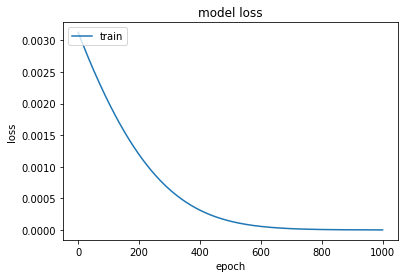

In [13]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# prediction of next 5 series

In [14]:
x_input = np.array(timeseries_data[-3:])
temp_series = list(x_input)
next_series = list()
print(x_input, temp_series)
x_input = x_input.reshape(1, 3, 1)
print('Reshaped input fed: \n', x_input.shape)

[ 89 144 233] [89, 144, 233]
Reshaped input fed: 
 (1, 3, 1)


In [15]:
model.predict(x_input).shape

1/1 [==============================] - 2s 2s/step


(1, 1)

In [16]:
i = 0
while i<5:
    print('input given for prediction: \n',x_input)
    y_hat = model.predict(x_input)
    next_series.append(y_hat[0][0])
    temp_series.append(y_hat[0][0])
    try:
        x_input = np.array(temp_series[-3:])
        x_input = x_input.reshape(1, 3, 1)
    except Exception as E:
        print(E)
    np.append(next_series, y_hat)
#     x_input = np.append(x_input, y_hat)

    
    print(f'{i} index element is {y_hat}')
    i+=1

input given for prediction: 
 [[[ 89]
  [144]
  [233]]]
1/1 [==============================] - 0s 72ms/step
0 index element is [[377.01923]]
input given for prediction: 
 [[[144.        ]
  [233.        ]
  [377.01922607]]]
1/1 [==============================] - 1s 1s/step
1 index element is [[608.042]]
input given for prediction: 
 [[[233.        ]
  [377.01922607]
  [608.04199219]]]
1/1 [==============================] - 0s 57ms/step
2 index element is [[979.60815]]
input given for prediction: 
 [[[377.01923]
  [608.042  ]
  [979.60815]]]
1/1 [==============================] - 0s 53ms/step
3 index element is [[1576.7855]]
input given for prediction: 
 [[[ 608.042  ]
  [ 979.60815]
  [1576.7855 ]]]
1/1 [==============================] - 0s 79ms/step
4 index element is [[2535.1826]]


In [17]:
next_series = [round(x) for x in next_series]

In [18]:
next_series = np.array(next_series)

In [19]:
true_seris = np.array([377, 610, 987, 1597, 2584])
net_differenc = true_seris - next_series
print(net_differenc)

[ 0  2  7 20 49]


# Plotting True Data vs Predicted data

In [20]:
index = np.arange(1, len(timeseries_data)+1)
p_index =np.arange(len(timeseries_data), len(timeseries_data)+5)

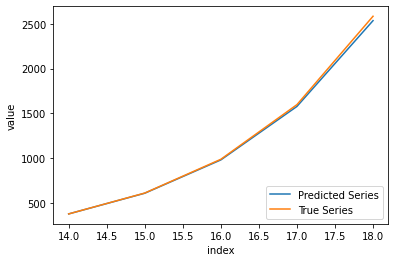

In [21]:
# plt.plot(index, timeseries_data)
#ploting true value vs predicted series
plt.plot(p_index, next_series, label='Predicted Series')
plt.plot(p_index, true_seris, label='True Series')
plt.xlabel("index")
plt.ylabel("value")
plt.legend(loc='lower right')
# plt.show()

# 